In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
X_train.max()

255

In [6]:
single_image = X_train[0]

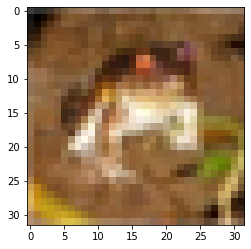

In [7]:
plt.imshow(single_image)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0].max()

1.0

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
Y_train[0]

array([6], dtype=uint8)

In [12]:
Y_test[1]

array([8], dtype=uint8)

In [13]:
Y_cat_train = to_categorical(Y_train,10) 
Y_cat_test = to_categorical(Y_test,10)

In [14]:
Y_cat_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [16]:
model=Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])



In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [18]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [19]:
model.fit(X_train,Y_cat_train,epochs=20,validation_data=(X_test,Y_cat_test),callbacks=[early_stop])

Epoch 1/20
1563/1563 [==============================] - 72s 45ms/step - loss: 1.5204 - accuracy: 0.4456 - val_loss: 1.3000 - val_accuracy: 0.5303
Epoch 2/20
1563/1563 [==============================] - 71s 46ms/step - loss: 1.2025 - accuracy: 0.5742 - val_loss: 1.1426 - val_accuracy: 0.5921
Epoch 3/20
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0629 - accuracy: 0.6256 - val_loss: 1.0395 - val_accuracy: 0.6394
Epoch 4/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9565 - accuracy: 0.6645 - val_loss: 1.0094 - val_accuracy: 0.6453
Epoch 5/20
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8754 - accuracy: 0.6945 - val_loss: 1.0466 - val_accuracy: 0.6371
Epoch 6/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8050 - accuracy: 0.7177 - val_loss: 0.9935 - val_accuracy: 0.6620
Epoch 7/20
1563/1563 [==============================] - 73s 46ms/step - loss: 0.7355 - accuracy: 0.7425 - val_loss: 1.0076 -

In [20]:
metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.520441,0.44560,1.300032,0.5303
1,1.202484,0.57418,1.142585,0.5921
2,1.062876,0.62562,1.039500,0.6394
3,0.956512,0.66448,1.009443,0.6453
4,0.875424,0.69452,1.046576,0.6371
5,0.805034,0.71768,0.993514,0.6620
6,0.735491,0.74246,1.007578,0.6619
7,0.670864,0.76570,0.991799,0.6716
8,0.612898,0.78582,0.986056,0.6775
9,0.562728,0.80196,1.024166,0.6750


In [22]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

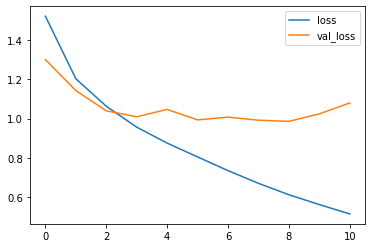

In [23]:
metrics[['loss','val_loss']].plot()

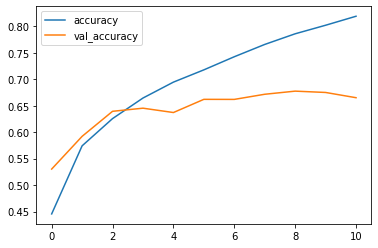

In [24]:
metrics[['accuracy', 'val_accuracy']].plot()

In [25]:
model.evaluate(X_test,Y_cat_test,verbose=0)

[1.0796116590499878, 0.6650999784469604]

In [26]:
predictions = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 4s 11ms/step


In [27]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1000
           1       0.85      0.72      0.78      1000
           2       0.61      0.56      0.58      1000
           3       0.46      0.41      0.43      1000
           4       0.68      0.56      0.62      1000
           5       0.49      0.66      0.56      1000
           6       0.69      0.81      0.75      1000
           7       0.74      0.69      0.71      1000
           8       0.77      0.77      0.77      1000
           9       0.77      0.74      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

